<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/san_lr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [12]:
from ucimlrepo import fetch_ucirepo

# Загрузка датасета о качестве вина
wine_quality = fetch_ucirepo(id=186)

# Признаки и целевая переменная
X = wine_quality.data.features
y = wine_quality.data.targets

# Объединяем признаки и целевую переменную в один DataFrame
import pandas as pd
df = pd.concat([X, y], axis=1)

# Добавляем информацию о цвете вина (красное / белое)
color_data = wine_quality.data.original['color']
df['color'] = color_data

# Просмотр первых строк и информации о данных
print(df.head())
df.info()

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

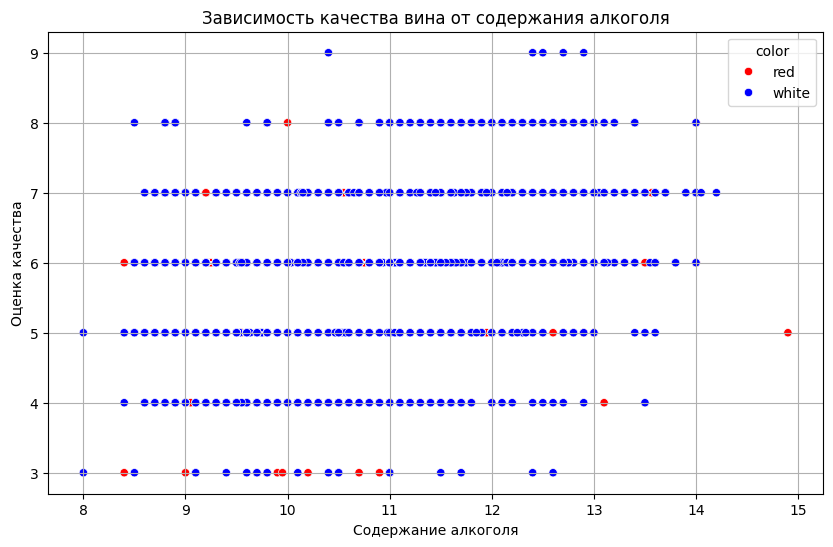

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1–2. Обычный scatter plot с оформлением и стилями
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='alcohol',
    y='quality',
    hue='color',
    palette={'red': 'red', 'white': 'blue'}
)

plt.title('Зависимость качества вина от содержания алкоголя')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Оценка качества')
plt.grid(True)
plt.show()


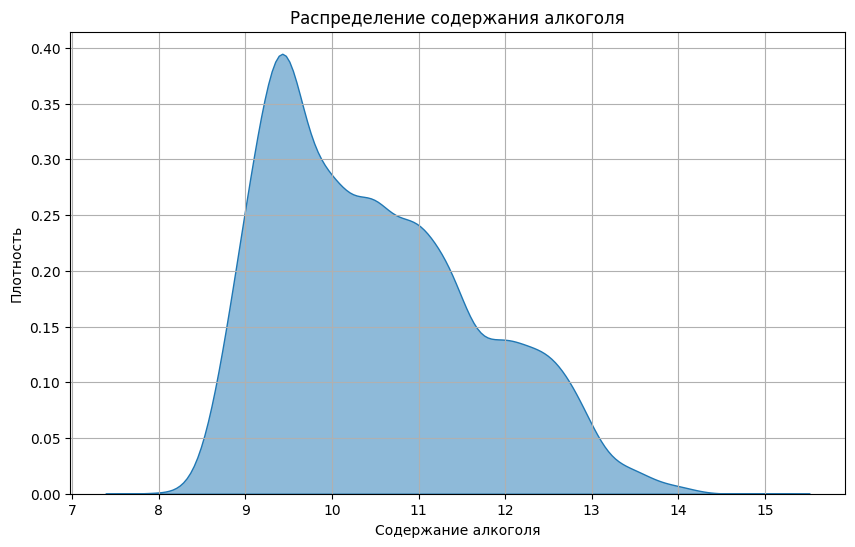

In [14]:

# 3. Оценка плотности распределения (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='alcohol', fill=True, alpha=0.5)
plt.title('Распределение содержания алкоголя')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

/tmp/ipython-input-1659005971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='color', y='quality', palette={'red': 'red', 'white': 'blue'})
/tmp/ipython-input-1659005971.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='color', y='quality', palette={'red': 'red', 'white': 'blue'})


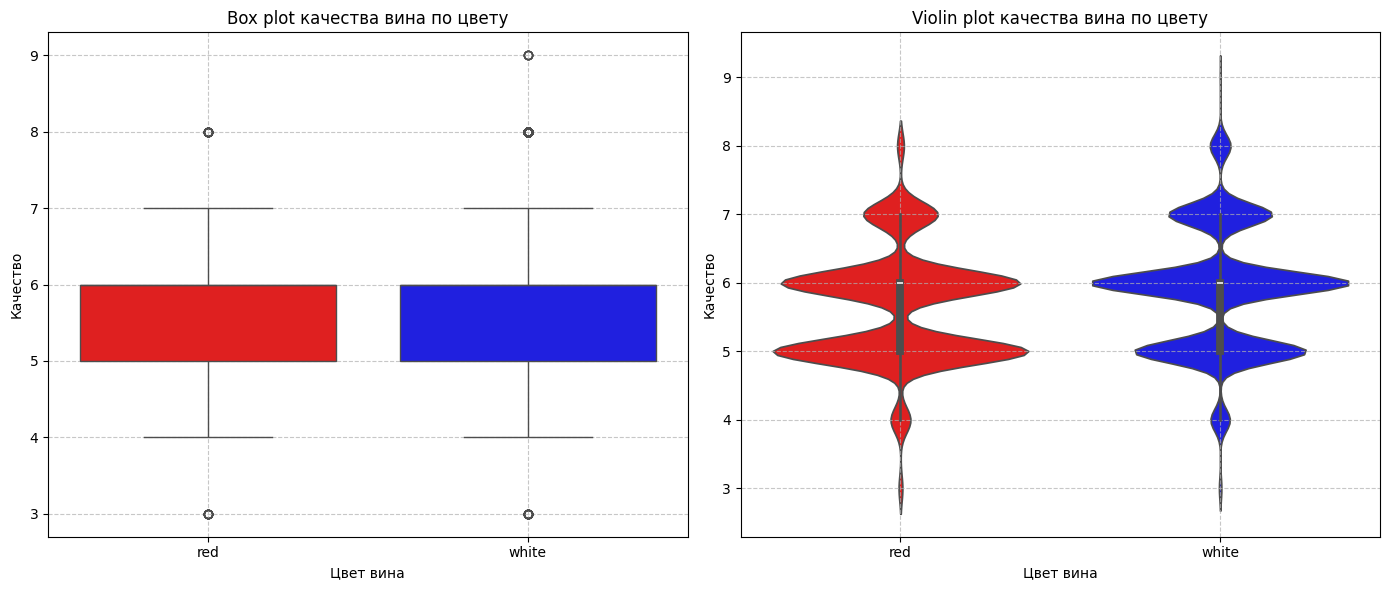

In [16]:
# 4–5. Box plot и Violin plot
plt.figure(figsize=(14, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='color', y='quality', palette={'red': 'red', 'white': 'blue'})
plt.title('Box plot качества вина по цвету')
plt.xlabel('Цвет вина')
plt.ylabel('Качество')
plt.grid(True, linestyle='--', alpha=0.7)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='color', y='quality', palette={'red': 'red', 'white': 'blue'})
plt.title('Violin plot качества вина по цвету')
plt.xlabel('Цвет вина')
plt.ylabel('Качество')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

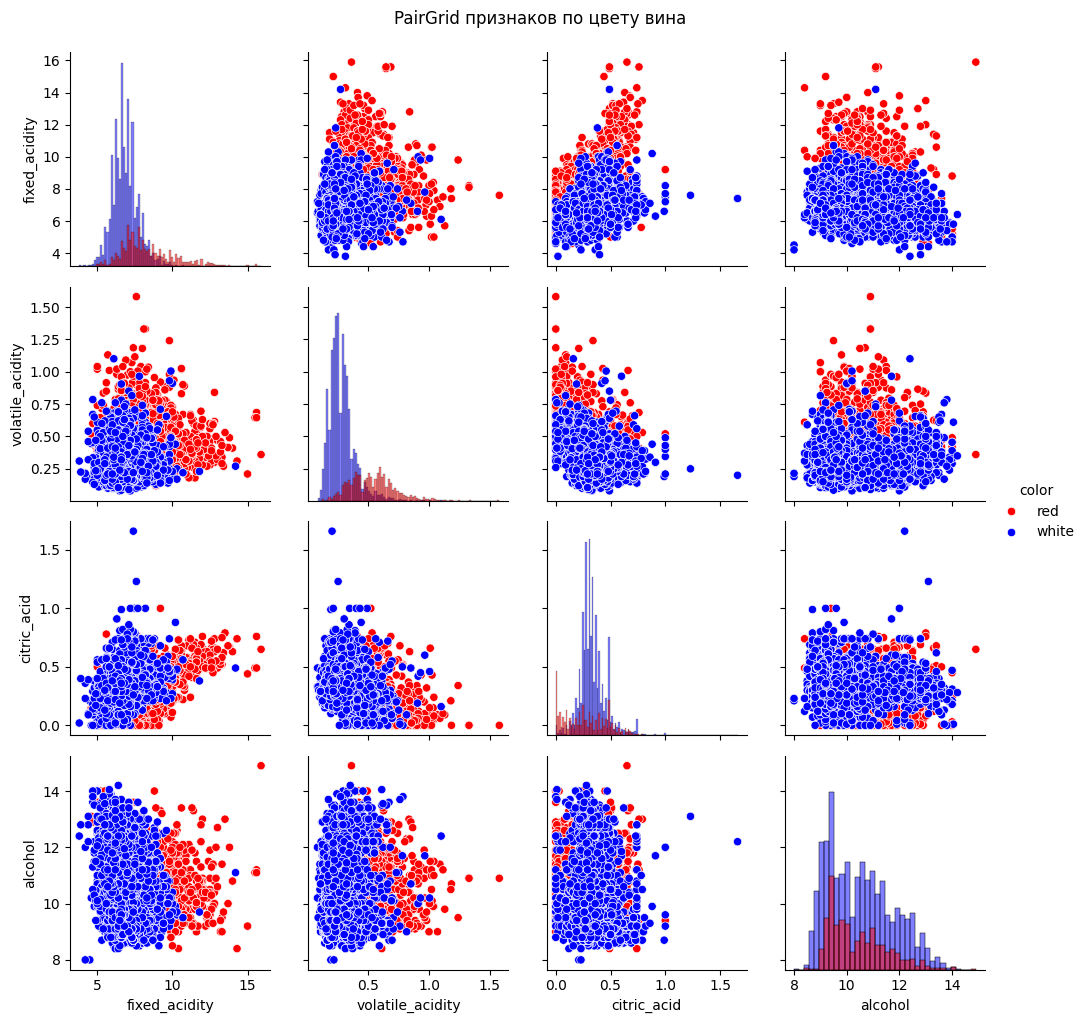

In [17]:

# 6. PairGrid для анализа попарных зависимостей
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'alcohol']
g = sns.PairGrid(df, vars=features, hue='color', palette={'red': 'red', 'white': 'blue'})
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
g.fig.suptitle('PairGrid признаков по цвету вина', y=1.02)
plt.show()

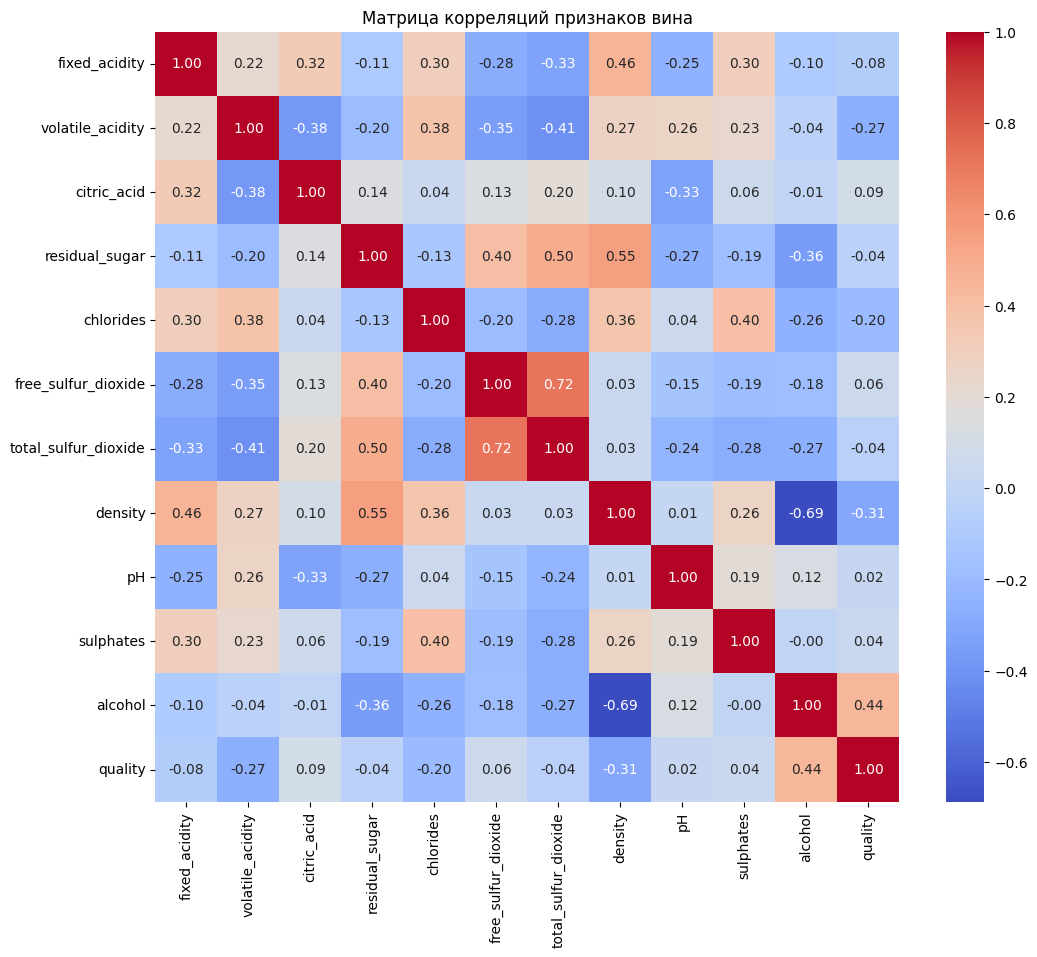

In [18]:

# 7. Тепловая карта корреляций
numeric_df = df.drop(columns=['color'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций признаков вина')
plt.show()

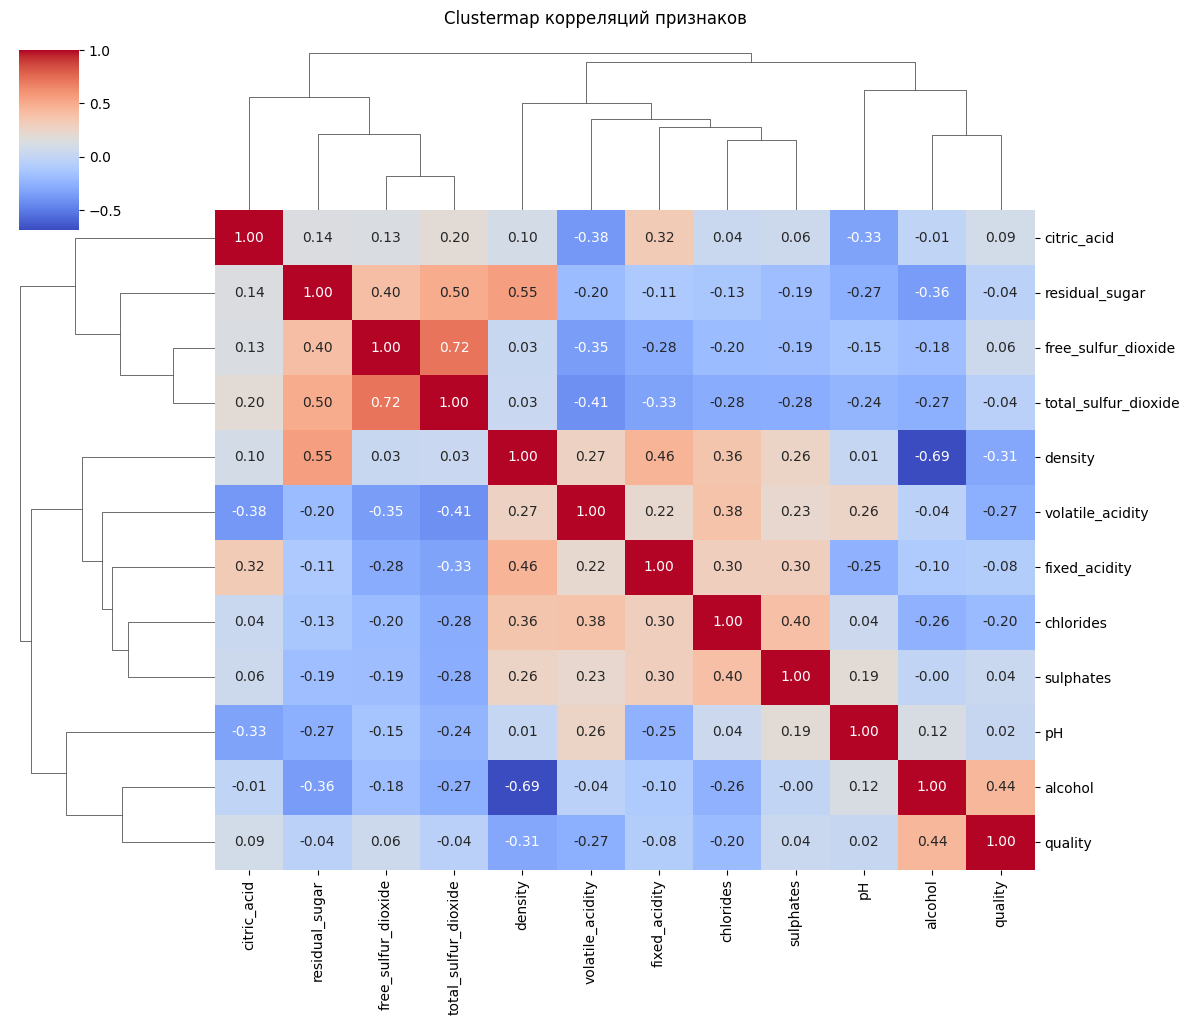

In [19]:
# 8. Clustermap корреляций
sns.clustermap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    figsize=(12, 10)
)
plt.suptitle('Clustermap корреляций признаков', y=1.02)
plt.show()

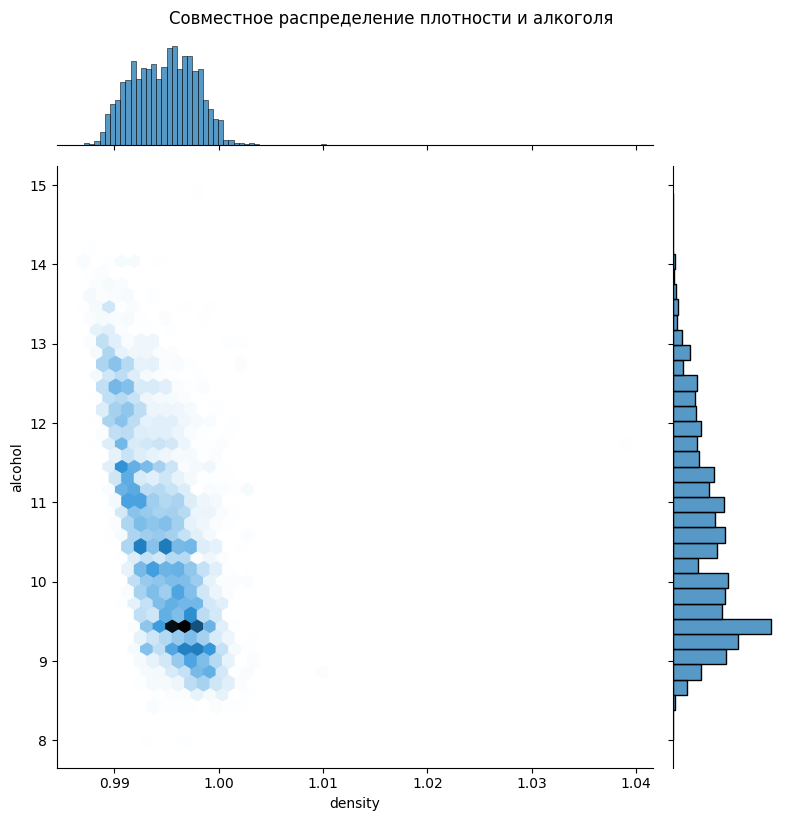

In [20]:
# 9. Jointplot для анализа совместного распределения
g = sns.jointplot(data=df, x='density', y='alcohol', kind='hex', height=8)
g.fig.suptitle('Совместное распределение плотности и алкоголя', y=1.02)
plt.show()